# An important decision in life, you'd better think it twice!

In this project, we'll analyse if there are any relations between the majors choosen in college by students, with their future jobs. Expected future employment rates, type of jobs, and earnings based on this important decision will be explored.

We'll use basically two python libraries for this study: pandas for data analysis, and matplotlib for its visualization and better understanding.

We'll try to anser the following questions:

* Which category of majors have the most students? 

* Do students in more popular majors make more money?

* How many majors are predominantly male? Predominantly female? 

* Its this last aspect important for their future median salary?

Summary of conclusions:

* Most popular majors as we could guess, are strogly related to low wage jobs, and higher unemployment. Although their median salary for full time jobs isn't lower than the rest.

* Majors predominantely male have a median salary for full time jobs higher than average. 


## A. Data preliminary analysis

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. 

The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data.
FiveThirtyEight cleaned the dataset and released it on their <a href = "https://github.com/fivethirtyeight/data/tree/master/college-majors" target = "_blank"> Github repo </a>.

In this section we'll look at dataframe structure and meaning of each column.

In [1]:
# read in the dataset
import pandas as pd
recent_grads = pd.read_csv("recent-grads.csv")

# a look at the first row as a table
recent_grads.iloc[1]


Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

Some columns titles description:

* **Rank** - Rank by median earnings (the dataset is ordered by this column).
* **Major_code** - Major code.
* **Major** - Major description.
* **Major_category** - Category of major.
* **Total** - Total number of people with major.
* **Sample_size** - Sample size (unweighted) of full-time.
* **Men** - Male graduates.
* **Women** - Female graduates.
* **ShareWomen** - Women as share of total.
* **Employed** - Number employed.
* **Median** - Median salary of full-time, year-round workers.
* **Low_wage_jobs** - Number in low-wage service jobs.
* **Full_time** - Number employed 35 hours or more.
* **Part_time** - Number employed less than 35 hours.

In [2]:
# a look at our dataframe structure
recent_grads.info()
print("o" + "-"*90 + "o") # dash separation

print(recent_grads.head(3))
print("o" + "-"*90 + "o")

raw_data_count = recent_grads.shape[0]
print("DataFrame 'recent_grads' , number of rows: {}\nDataFrame 'recent_grads' , number of columns: {}\nraw_data_count = {}".format(recent_grads.shape[0],recent_grads.shape[1],recent_grads.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [3]:
recent_grads.describe(include = "all").iloc[:5] # include also non numeric columns

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.0,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.00000,173.000000,173.000000,173.000000,173.000000,173.000000,173.00000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ARCHITECTURAL ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.0,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.32948,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.49711,3859.017341


In [4]:
# localize one row with NaN values in some columns
recent_grads[recent_grads["Total"].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [5]:
# drop this row from out dataset
recent_grads = recent_grads.dropna()

clean_data_count = recent_grads.shape[0]
print("DataFrame 'recent_grads' , number of rows: {}\nDataFrame 'recent_grads' , number of columns: {}\nclean_data_count = {}".format(recent_grads.shape[0],recent_grads.shape[1],recent_grads.shape[0]))

DataFrame 'recent_grads' , number of rows: 172
DataFrame 'recent_grads' , number of columns: 21
clean_data_count = 172


## B. Visualizing relationships between variables

In this section we are going yo study the following relationships between the columns of our "recent_grads" DataFrame:

1. Sample_size and Median
2. Sample_size and Unemployment_rate
3. Full_time and Median
4. ShareWomen and Unemployment_rate
5. Men and Median
6. Women and Median
7. Total and Median--> Do students in more popular major make more money?
8. ShareWomen and Median--> Do students that majored in subjects that were majority female make more money?


For this task we'll use scatter plots.

In [6]:
import matplotlib.pyplot as plt
# this allow plots are displayed inline in Jupyter NB
%matplotlib inline 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


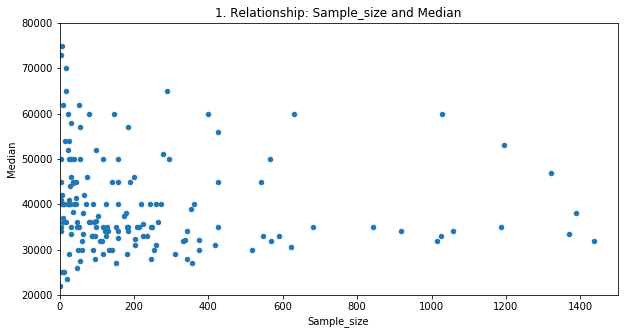

In [7]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "Sample_size", y = "Median", kind = "scatter", title = "1. Relationship: Sample_size and Median", figsize = (10, 5))

ax.set_xlim(0, 1500) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(20000, 80000) 
plt.show()

Comments: as expected there is no evidence of relationship between "Sample_size" (*see column description at the beggining*) and "Median".

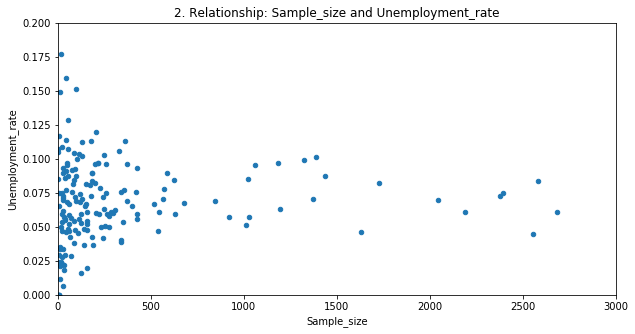

In [8]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "Sample_size", y = "Unemployment_rate", kind = "scatter", title = "2. Relationship: Sample_size and Unemployment_rate", figsize = (10, 5))

ax.set_xlim(0, 3000) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(0, 0.20) 
plt.show()

Comments: there is no evidence of relationship between these columns. *For a  better undestanding, please see columns description at the beggining*

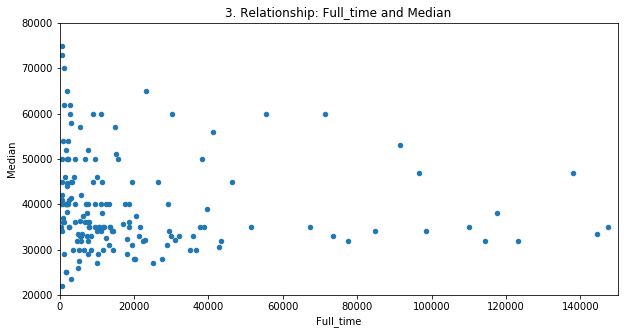

In [9]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "Full_time", y = "Median", kind = "scatter", title = "3. Relationship: Full_time and Median", figsize = (10, 5))

ax.set_xlim(0, 150000) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(20000, 80000) 
plt.show()

Comments: there is no evidence of relationship between these columns. *For a  better undestanding, please see columns description at the beggining*

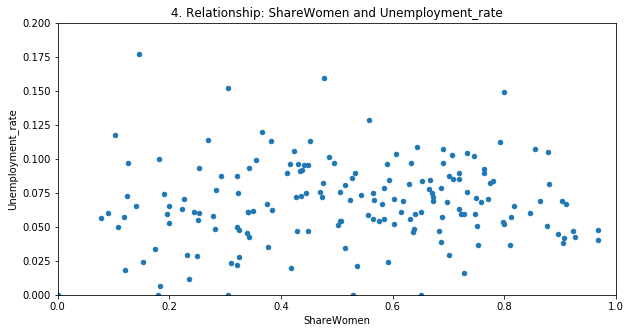

In [10]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "ShareWomen", y = "Unemployment_rate", kind = "scatter", title = "4. Relationship: ShareWomen and Unemployment_rate", figsize = (10, 5))

ax.set_xlim(0, 1) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(0, 0.20) 
plt.show()

Comments: there is no evidence of relationship between these columns. *For a  better undestanding, please see columns description at the beggining*

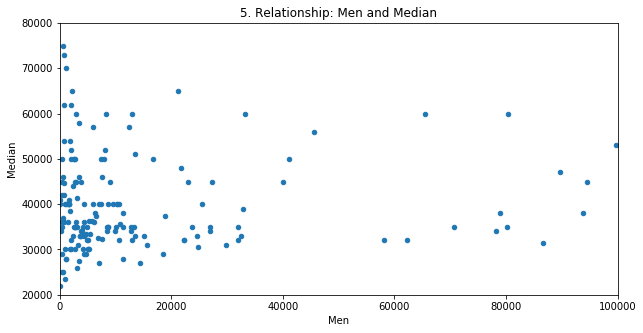

In [11]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "Men", y = "Median", kind = "scatter", title = "5. Relationship: Men and Median", figsize = (10, 5))

ax.set_xlim(0, 100000) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(20000, 80000) 
plt.show()

Comments: there is no evidence of relationship between these columns. *For a  better undestanding, please see columns description at the beggining*

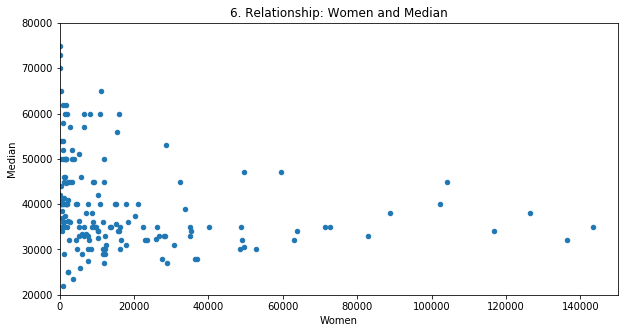

In [12]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "Women", y = "Median", kind = "scatter", title = "6. Relationship: Women and Median", figsize = (10, 5))

ax.set_xlim(0, 150000) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(20000, 80000) 
plt.show()

Comments: there is no evidence of relationship between these columns. *For a  better undestanding, please see columns description at the beggining*

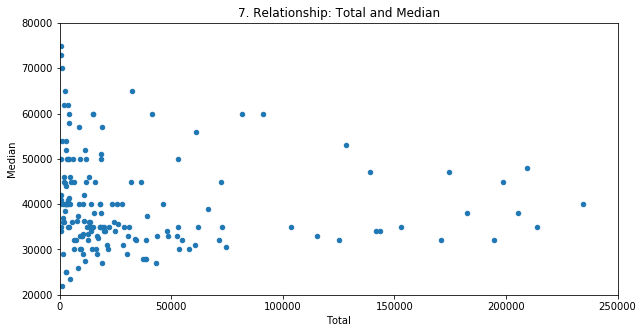

In [13]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "Total", y = "Median", kind = "scatter", title = "7. Relationship: Total and Median", figsize = (10, 5))

ax.set_xlim(0, 250000) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(20000, 80000) 
plt.show()

Comments: there is no evidence of relationship between these columns. *For a  better undestanding, please see columns description at the beggining*

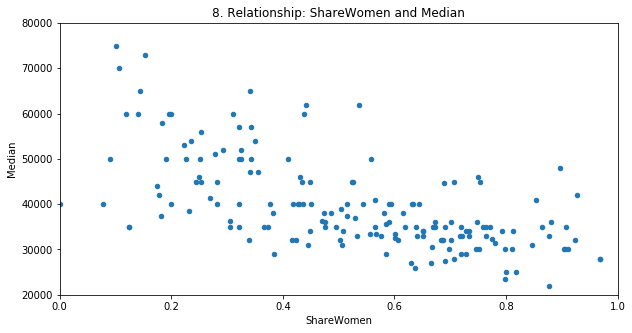

In [14]:
# assign axes object to a variable to access later
ax = recent_grads.plot(x = "ShareWomen", y = "Median", kind = "scatter", title = "8. Relationship: ShareWomen and Median", figsize = (10, 5))

ax.set_xlim(0, 1) # for better visualization. X values beyond this limits ar null or scarce
ax.set_ylim(20000, 80000) # apply limits also for Y values for a better view
plt.show()

Comments: In this case, although we would need more numeric data (e.g a correlation coeficient), it seems there is some kind of negative relation between these columns. For example we can see in this plot that above a *ShareWomen* percentage of 0.6 (60% women), there are no *Median* values above 50,000. On the contrary there is no *Median* values bellow 30,000 for *ShareWomen* values bellow 0.3 (30% women).
*For a  better undestanding, please see columns description at the beggining*

## C. Analysing some columns in detail

We'll use in this section histograms and boxplots for analysing the frecuency distribution for values of some columns of interest.

In order to simplify and try to see the most of information at a glance, in many histrograms bellow **y** axis scale that normaly counts the number of **x** values, has been transform in a percentage scale.


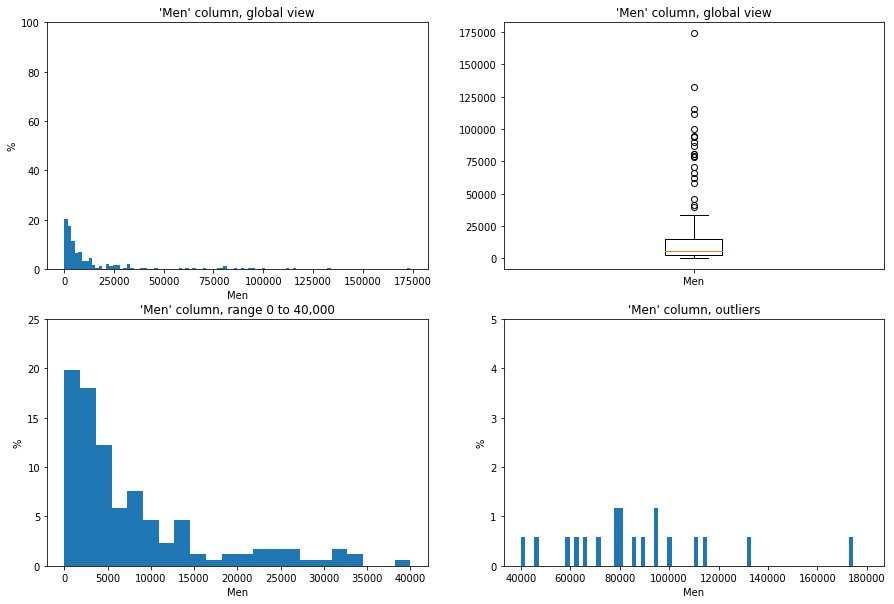

In [16]:
# Use numpy to make up an array which stores the percentages of each unique value in this column
import numpy as np
perc = np.array(recent_grads["Men"].value_counts(normalize = True)*100)

# Creates a multiplot 
fig = plt.figure(figsize =(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# histogram for a global view of data in this column
ax1.hist(recent_grads["Men"].unique(), weights = perc, bins = 100) # use perc created before and weights argument to change y scale to percentage
ax1.set_ylim(0, 100) # normal limits for a percentage
ax1.set_ylabel("%")
ax1.set_xlabel("Men")
ax1.set_title ("'Men' column, global view")
 

# boxplot for a better view of most frecuent values and outliers
ax2.boxplot(recent_grads["Men"])
ax2.set_xticklabels(["Men"])
ax2.set_title ("'Men' column, global view")


# histogram for most frecuent values
ax3.hist(recent_grads["Men"].unique(), weights = perc, bins = 22, range = (0, 40000)) # arrange range and nºbins in proportion
ax3.set_ylim(0, 25) # fix new limits for a better view
ax3.set_ylabel("%")
ax3.set_xlabel("Men")
ax3.set_title ("'Men' column, range 0 to 40,000")

# To visualize extreme values for this column 
ax4.hist(recent_grads["Men"].unique(), weights = perc, bins = 78, range = (40000, 180000)) 
ax4.set_ylim(0, 5) 
ax4.set_ylabel("%")
ax4.set_xlabel("Men")
ax4.set_title ("'Men' column, outliers")


plt.show() 


Comments: 

These plots above show majors distribution depending on their number of males.

* Majors with less than 25,000 males represent more than 75% of Total.  


* There are quite a few extreme values of majors with a maximun number of males from 40,000 males. We will choose this limit below to see what majors correspond to. 

In [17]:
# short Major and Major_category names
recent_grads["Major"] = recent_grads["Major"].str.split().str.join(" ").str[0:15] + "..."
recent_grads["Major_category"] = recent_grads["Major_category"].str.split().str.join(" ").str[0:15] + "..."

# store dataframe with the highest number of males
male_majors = recent_grads.loc[recent_grads["Men"] > 40000, ["Major","Major_category", "Men", "Women", "ShareWomen", "Median"]].sort_values(by = ["Men"])

print("Majors with the highest numbers of males: ")
print()
print(male_majors)
print("o" + "-"*90 + "o")

print(male_majors.describe())

Majors with the highest numbers of males: 

                  Major      Major_category       Men     Women  ShareWomen  \
25   CIVIL ENGINEERI...      Engineering...   41081.0   12072.0    0.227118   
17   GENERAL ENGINEE...      Engineering...   45683.0   15469.0    0.252960   
137  ENGLISH LANGUAG...  Humanities & Li...   58227.0  136446.0    0.700898   
139  PHYSICAL FITNES...  Industrial Arts...   62181.0   62893.0    0.502846   
9    ELECTRICAL ENGI...      Engineering...   65511.0   16016.0    0.196450   
93    COMMUNICATIONS...  Communications ...   70619.0  143377.0    0.669999   
114          HISTORY...  Humanities & Li...   78253.0   63698.0    0.448732   
77   MARKETING AND M...         Business...   78857.0  126354.0    0.615727   
94   CRIMINAL JUSTIC...  Law & Public Po...   80231.0   72593.0    0.475010   
8    MECHANICAL ENGI...      Engineering...   80320.0   10907.0    0.119559   
145       PSYCHOLOGY...  Psychology & So...   86648.0  307087.0    0.779933   
36      

From these data above can highlight the following:

* The most frecuent category of these majors is **Business** (5 of 19) followed by **Engineering** (4 of 19).


* In general majors with more males has an average in female of 44%. So men are only slightly predominant.


* Its median salary is approximately 42,000

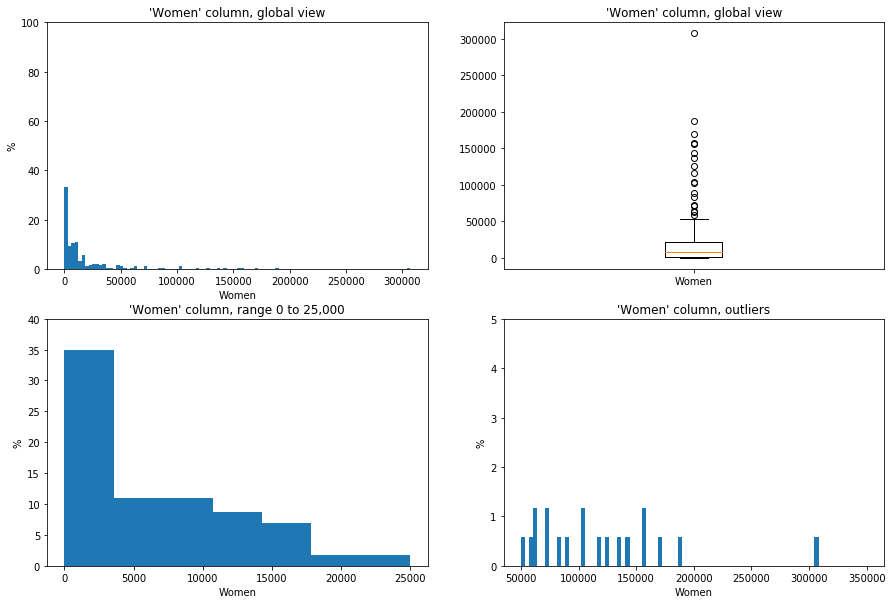

In [18]:
# Use numpy to make up an array which stores the percentages of each unique value in this column
import numpy as np
perc = np.array(recent_grads["Women"].value_counts(normalize = True)*100)

# Creates a multiplot from the same column using different ranges and bins config
fig = plt.figure(figsize =(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# Plot for a global view of data in this column
ax1.hist(recent_grads["Women"].unique(), weights = perc, bins = 100) # use perc created before and weights argument to change y scale to percentage
ax1.set_ylim(0, 100) # normal limits for a percentage
ax1.set_ylabel("%")
ax1.set_xlabel("Women")
ax1.set_title ("'Women' column, global view")
 

# boxplot for a better view of most frecuent values and outliers
ax2.boxplot(recent_grads["Women"])
ax2.set_xticklabels(["Women"])
ax2.set_title ("'Women' column, global view")

# histogram for most frecuent values
ax3.hist(recent_grads["Women"].unique(), weights = perc, bins = 7, range = (0, 25000)) # change range and bins in proportion
ax3.set_ylim(0, 40) 
ax3.set_ylabel("%")
ax3.set_xlabel("Women")
ax3.set_title ("'Women' column, range 0 to 25,000")

# To visualize extreme values for this column 
ax4.hist(recent_grads["Women"].unique(), weights = perc, bins = 86, range = (50000, 350000)) 
ax4.set_ylim(0, 5) 
ax4.set_ylabel("%")
ax4.set_xlabel("Women")
ax4.set_title ("'Women' column, outliers")


plt.show() 


Comments: 

* In the case of women, range is wider than in males. It span to more than 300,000. Although like in males, majors of less than 25,000 woman represent 75% of total approximately. 


* There are also quite a few extreme values. We will chose a limit of 50,000, from where outliers began, to select the majors with the highest numbers of women. 

In [19]:
# store dataframe with the majors with the highest number of female
female_majors = recent_grads.loc[recent_grads["Women"] > 50000, ["Major","Major_category", "Women", "ShareWomen","Men", "Median"]].sort_values(by = ["Women"])

print("Majors with the highest numbers of females: ")
print()
print(female_majors)
print("o" + "-"*90 + "o")

print(female_majors.describe())

Majors with the highest numbers of females: 

                  Major      Major_category     Women  ShareWomen       Men  \
150  FAMILY AND CONS...  Industrial Arts...   52835.0    0.910933    5166.0   
35           FINANCE...         Business...   59476.0    0.340825  115030.0   
139  PHYSICAL FITNES...  Industrial Arts...   62893.0    0.502846   62181.0   
114          HISTORY...  Humanities & Li...   63698.0    0.448732   78253.0   
95   COMMERCIAL ART ...             Arts...   71439.0    0.690365   32041.0   
94   CRIMINAL JUSTIC...  Law & Public Po...   72593.0    0.475010   80231.0   
124        SOCIOLOGY...   Social Science...   82923.0    0.718365   32510.0   
78   POLITICAL SCIEN...   Social Science...   88741.0    0.485930   93880.0   
57   GENERAL BUSINES...         Business...  102352.0    0.436302  132238.0   
40        ACCOUNTING...         Business...  104114.0    0.524153   94519.0   
113  GENERAL EDUCATI...        Education...  116825.0    0.812877   26893.0   
77   M

From these data above can highlight the following:

* Like in males, the most frecuent category of these majors is **Business** (5 of 19). **Engineering** doesn't appears. And another new different categories like **Education** or **Nursing** are present.


* Majors with the higest numbers of females have an average percentage of 63% women. There is a higher difference between men and women than in the case of majors with the higest number of mans. There are two major which stand out from the rest in this difference: Nursing and Elementary Education (89% and 92% of women respectively). 


* Its median salary is approximately 36,000 (-6,000 respect Major with the highest numbers of males).

In [20]:
pred_male_majors = recent_grads.loc[recent_grads["ShareWomen"] < 0.25, ["Major","Major_category", "Men","Women","ShareWomen","Median"]].sort_values(by = ["ShareWomen"])

print("Majors predominantly males: ")
print()
print(pred_male_majors)
print("o" + "-"*90 + "o")

print(pred_male_majors.describe())

Majors predominantly males: 

                  Major      Major_category      Men    Women  ShareWomen  \
73   MILITARY TECHNO...  Industrial Arts...    124.0      0.0    0.000000   
66   MECHANICAL ENGI...      Engineering...   4419.0    371.0    0.077453   
26   CONSTRUCTION SE...  Industrial Arts...  16820.0   1678.0    0.090713   
1    MINING AND MINE...      Engineering...    679.0     77.0    0.101852   
3    NAVAL ARCHITECT...      Engineering...   1123.0    135.0    0.107313   
8    MECHANICAL ENGI...      Engineering...  80320.0  10907.0    0.119559   
0    PETROLEUM ENGIN...      Engineering...   2057.0    282.0    0.120564   
106  TRANSPORTATION ...  Industrial Arts...  13257.0   1893.0    0.124950   
111         FORESTRY...  Agriculture & N...   3156.0    451.0    0.125035   
11   AEROSPACE ENGIN...      Engineering...  12953.0   2105.0    0.139793   
5    NUCLEAR ENGINEE...      Engineering...   2200.0    373.0    0.144967   
2    METALLURGICAL E...      Engineering...   

Comments:

For a better comparison of the two previous analysis.These data above show the majors predominantely male (less than 0.25% of women). This limit would belong to values out of the quantile 75% of ShareWomen column values. Due to the fact than majors with either the higest number of males or females, don't corresponds exactly to the majors predominantly male or female respectively. 

Points to highligt here:

* The most frecuent category of these majors is clearly **Engineering** followed from afar by  **Computers and Mathematics**.


* Its median salary is approximately 53,000 (+17,000 vs majors predominantly female we have chosen above)

Finally for this section we'll analyse bellow what is the most common median salary range in our dataframe and will compare it with previous results.

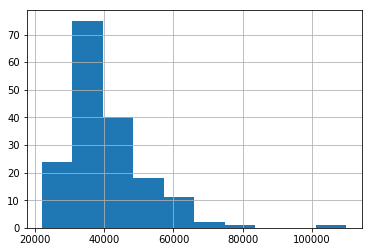

Salary quantile 25%:33000.0
Median salary:	    36000.0
Salary quantile 75%:45000.0


In [21]:
# get a histogram plot 
recent_grads["Median"].hist()

plt.show()

print("Salary quantile 25%:{}\nMedian salary:\t{:>11}\nSalary quantile 75%:{}".format(recent_grads["Median"].quantile(q = 0.25),recent_grads["Median"].median(),recent_grads["Median"].quantile(q = 0.75)))

Comments:

In this histogram we have a representation of the distribution of Median values in our dataframe. There are also calculations for the numeric date of median, 25% and 75% quantile for more precision. 

If we compare these results with the previus media salary calculations for majors predominantly male and female, we can find out the following:

* The majors predominantly females we had choosen previously, have a median salary of 36,000. This match exactly with the median salary for the total of major in our dataframe.


* The majors predominantly males we had choosen previously, have a median salary of 53,000. Beyond 75% quantile. So there is an appreciably and possitive difference respect the median salary of the total majors.

## D. How can total numbers of students per majors affect to other parameters?

In this section we'll try to find out if the number of studens per major can affect to other important factors in its future jobs, like median salary, low wage jobs or unemploment.

Firsly we will check the distribution of total number of students number per majors.

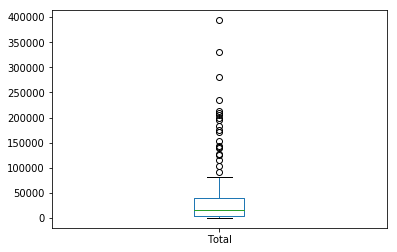

In [22]:
# boxplot of Total frecuency distribution
recent_grads["Total"].plot.box()

plt.show()

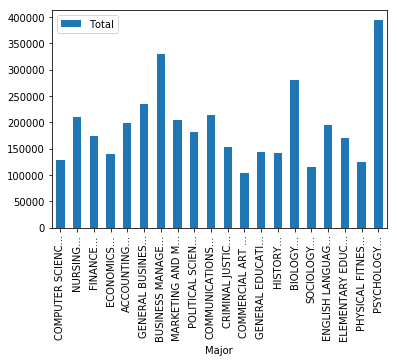

In [23]:
# bar plot showing most popular majors. The limit (100,000) has been chosen for the previous plot.
recent_grads[recent_grads["Total"] > 100000].plot.bar(x = "Major", y = "Total")

plt.show()

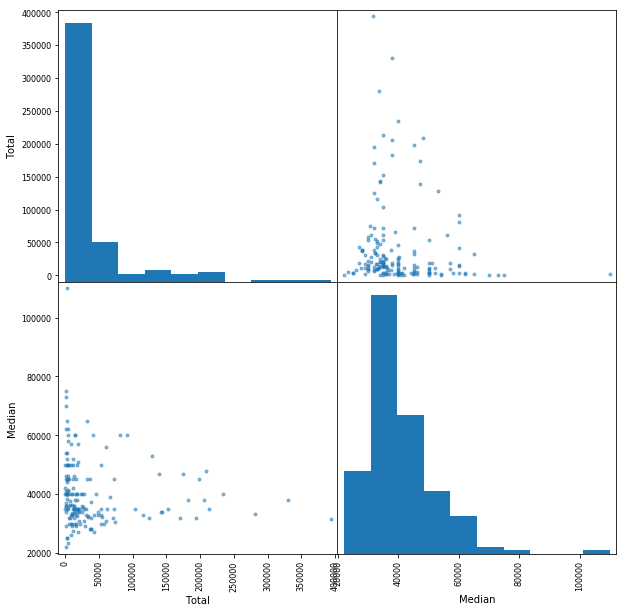

In [25]:
# get scatter_matrix module
from pandas import scatter_matrix

# draw a set of plots (histogram and scatter) from these columns
scatter_matrix(recent_grads[["Total", "Median"]], figsize = (10, 10))

plt.show()

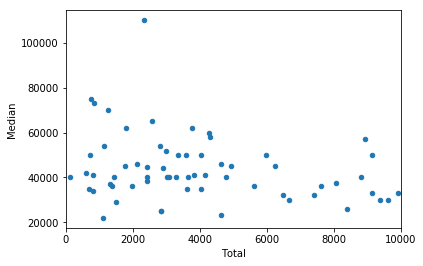

Correlation coeficient (r) between Total and Median = -0.11


In [26]:
# to get a closer view of its relationship
ax = recent_grads.plot(x = "Total", y= "Median", kind = "scatter")

ax.set_xlim(0, 10000)

plt.show()

r = np.corrcoef(recent_grads["Total"], y = recent_grads["Median"])

# calculate correlation coeficient to solve any doubts
print("Correlation coeficient (r) between Total and Median = {:.2f}".format(r[0][1]))

Comments:

From the two set of plots above we can say that there is no relation between the total number of students in a major, and the median salary of their respectives full time jobs. 

To clear any doubts, the correlation coeficient calculated stand out that as the number of students raise the median salaries drops. But only a 11% of this drop can be explained by the total number of students.

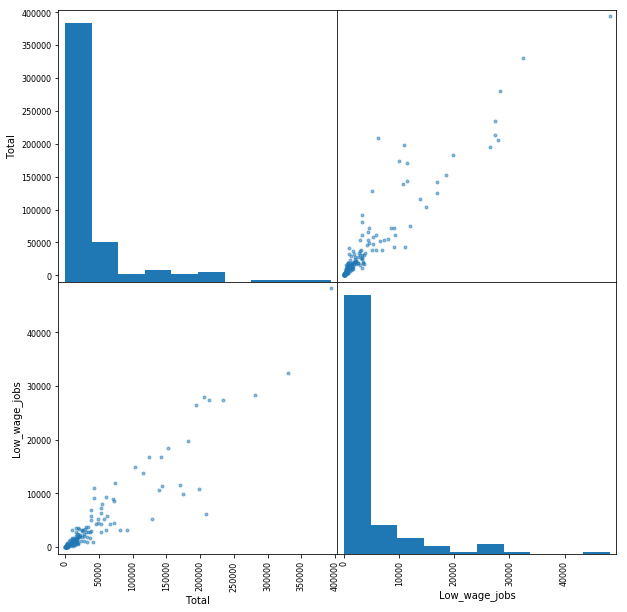

In [27]:
# draw a set of plots (histogram and scatter) from these columns
scatter_matrix(recent_grads[["Total", "Low_wage_jobs"]], figsize = (10, 10))

plt.show()

In [ ]:
# draw a boxplot from this column to get a closer view of its values distribution
fig, ax = plt.subplots()

ax.boxplot(recent_grads["Low_wage_jobs"])
ax.set_xticklabels(["Low_wage_jobs"])

plt.show()

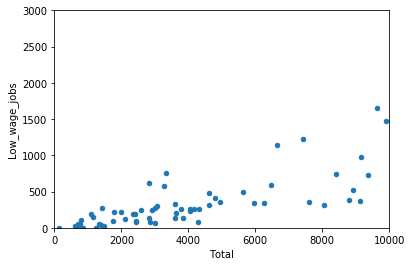

Correlation coeficient (r) between Total and Low_wage_jobs = 0.94


In [28]:
# draw a new scatter plot with new ranges for better visualization
ax = recent_grads.plot(x = "Total", y= "Low_wage_jobs", kind = "scatter")

ax.set_xlim(0, 10000) # set these limits from previous histogram
ax.set_ylim(0, 3000) 

plt.show()

# calculate coeficient
r = np.corrcoef(recent_grads["Total"], y = recent_grads["Low_wage_jobs"])

print("Correlation coeficient (r) between Total and Low_wage_jobs = {:.2f}".format(r[0][1]))

Comments:

Previously we couldn't find a clear negative relationship between total number of students per major and median salaries of full time jobs. However in this plot above, we can see a strong positive relation between the total number of students in a major, and its number of low wage jobs in the future.

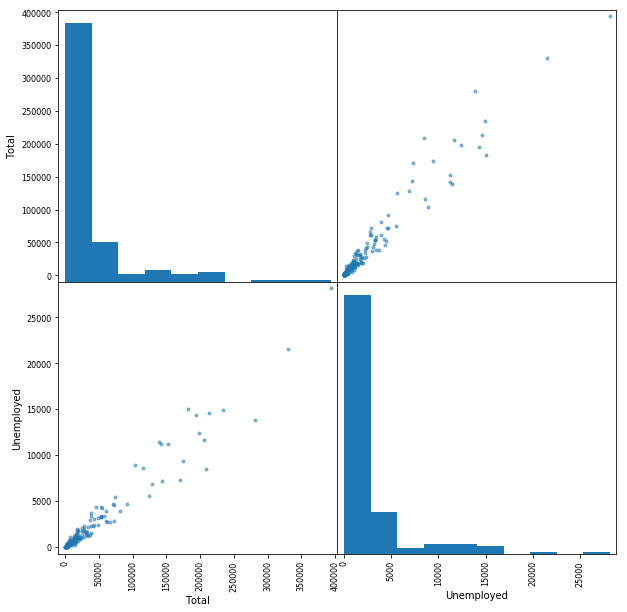

Correlation coeficient (r) between Total and Unemployed = 0.97


In [29]:
# draw a set of plots (histogram and scatter) from these columns
scatter_matrix(recent_grads[["Total", "Unemployed"]], figsize = (10, 10))

plt.show()

# calculate coeficient
r = np.corrcoef(recent_grads["Total"], y = recent_grads["Unemployed"])

print("Correlation coeficient (r) between Total and Unemployed = {:.2f}".format(r[0][1]))

Comments:

The relation between the total number of students in a major and its number of unemployed is even strong (r = 0,97).

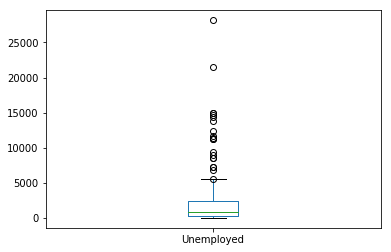

In [30]:
# show unemployed distribution of values
recent_grads["Unemployed"].plot.box()

plt.show()

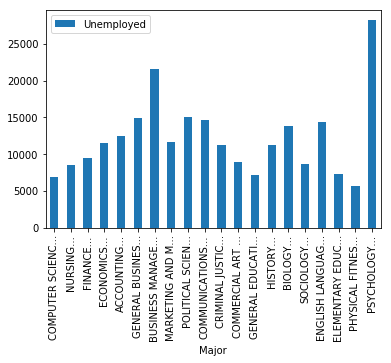

In [31]:
# bar plot of the most popular majors (beyond 100000 students) and their number of unemployed
recent_grads[recent_grads["Total"] > 100000].plot.bar(x = "Major", y = "Unemployed")

plt.show()

Comments: 

From the last two plots above we can highlight that majors with more than 100,000 students, which we can consider the most popular according to its frecuency distribution per total students, have a number of unemployed higher than 5,000.

This number of 5,000 is far beyond quantile 75% of unemployed distribution of values and we can consider this values much higer than average.  

# Final Conclusions:

* Most popular majors, as we could guess, are strogly related to low wage jobs, and higher unemployment. Although this doens't mean that its median salaries for full time jobs are lower than the rest.


* The two most popular majors are **Psychology** and **Business Management**,and they are respectively the majors with the higest level of unemployment.


* Majors predominantely male (considering less than 25% of women) belongs mainly to **Engineering** category, and their median salary is approximately 53,000 (+17,000 vs median salary for full time jobs of all majors).
